## Transfer Learning VGG 16 and VGG 19 using Keras

Please download the dataset from the below url

In [2]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [3]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = r'd:\final_dataset\train'
valid_path = r'd:\final_dataset\val'


In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [6]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob(r'd:\final_dataset\train\*')

In [8]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [27]:
from tensorflow.keras.optimizers import Adam
# tell the model what cost and optimization method to use
learning_rate = 0.000899  # You can change this

# Compile model with custom learning rate
model.compile(
    optimizer=Adam(learning_rate=learning_rate),
    loss='categorical_crossentropy',  # or 'binary_crossentropy' depending on your task
    metrics=['accuracy']
)

In [28]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [29]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(r'd:\final_dataset\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1211 images belonging to 2 classes.


In [30]:
test_set = test_datagen.flow_from_directory(r'd:\final_dataset\val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 301 images belonging to 2 classes.


In [31]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  
  
)

Epoch 1/50


c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 8/38 ━━━━━━━━━━━━━━━━━━━━ 3:12 6s/step - accuracy: 0.7981 - loss: 1.3539

KeyboardInterrupt: 

In [1]:
import matplotlib.pyplot as plt

# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

NameError: name 'r' is not defined

In [23]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [30]:

y_pred = model.predict(test_set)


10/10 ━━━━━━━━━━━━━━━━━━━━ 50s 4s/step


In [31]:
y_pred

array([[5.33258133e-02, 9.46674228e-01],
       [2.80622803e-02, 9.71937716e-01],
       [2.74709284e-01, 7.25290716e-01],
       [9.17412806e-03, 9.90825832e-01],
       [3.44197586e-04, 9.99655843e-01],
       [9.93062276e-03, 9.90069330e-01],
       [1.00376895e-02, 9.89962339e-01],
       [1.92954727e-02, 9.80704486e-01],
       [5.01445889e-01, 4.98554111e-01],
       [3.72019112e-01, 6.27980888e-01],
       [3.21324281e-02, 9.67867553e-01],
       [8.15570951e-01, 1.84429049e-01],
       [5.24506345e-02, 9.47549343e-01],
       [1.39065638e-01, 8.60934377e-01],
       [3.18309292e-02, 9.68169093e-01],
       [1.07709512e-01, 8.92290533e-01],
       [1.65819168e-01, 8.34180772e-01],
       [2.15492785e-01, 7.84507155e-01],
       [5.75457104e-02, 9.42454219e-01],
       [2.55512334e-02, 9.74448740e-01],
       [3.38438302e-01, 6.61561728e-01],
       [5.32879569e-02, 9.46712017e-01],
       [5.73299534e-04, 9.99426723e-01],
       [2.89004034e-04, 9.99710977e-01],
       [3.537336

In [32]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [33]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [72]:
model=load_model('model_resnet50.h5')

FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = 'model_resnet50.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [40]:
x=image.img_to_array(img)
x

array([[[201., 200., 214.],
        [200., 196., 210.],
        [193., 189., 204.],
        ...,
        [233., 221., 255.],
        [229., 217., 255.],
        [225., 210., 249.]],

       [[203., 201., 223.],
        [200., 196., 219.],
        [192., 188., 211.],
        ...,
        [233., 221., 255.],
        [229., 217., 255.],
        [224., 212., 250.]],

       [[202., 203., 231.],
        [199., 199., 227.],
        [190., 190., 216.],
        ...,
        [232., 220., 255.],
        [229., 217., 255.],
        [227., 215., 253.]],

       ...,

       [[216., 216., 216.],
        [208., 208., 206.],
        [202., 202., 200.],
        ...,
        [ 38.,  48.,  23.],
        [ 40.,  50.,  25.],
        [ 44.,  50.,  24.]],

       [[213., 215., 214.],
        [205., 207., 204.],
        [199., 201., 198.],
        ...,
        [ 39.,  49.,  24.],
        [ 41.,  51.,  26.],
        [ 46.,  50.,  25.]],

       [[210., 214., 213.],
        [202., 207., 203.],
        [196., 2

In [41]:
x.shape

(224, 224, 3)

In [42]:
x=x/255

In [43]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [44]:
model.predict(img_data)

array([[2.7411699e-07, 9.9999976e-01]], dtype=float32)

In [17]:
!python --version

Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Apps > Advanced app settings > App execution aliases.


In [46]:
a=np.argmax(model.predict(img_data), axis=1)

In [102]:
a==1

array([ True])

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 196ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 297ms/step


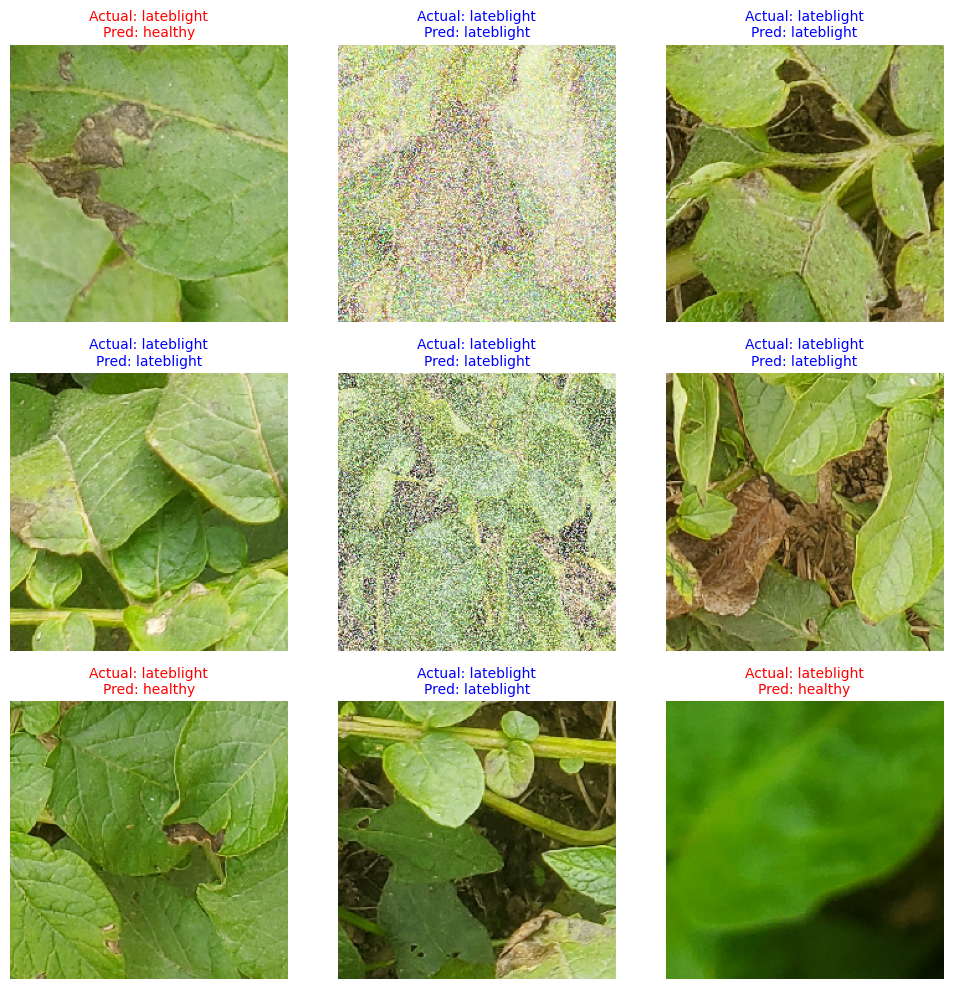

In [33]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Load the trained model
model = tf.keras.models.load_model(r"D:\fyp\model_resnet50(fit).h5")  # Replace with your .h5 file

# Define test folder path
test_folder = r"D:\final_dataset\test"  # Update with your test images folder path

# Define image size (Should match ResNet50 input size)
img_size = (224, 224)  # Update based on your model input size

# Get class names from folder structure
class_names = sorted(os.listdir(test_folder))  # Assumes folders are named after classes

# List to store image paths and their actual labels
image_data = []

# Iterate through each class folder and get images
for class_name in class_names:
    class_folder = os.path.join(test_folder, class_name)
    if os.path.isdir(class_folder):  # Ensure it's a directory
        for img_name in os.listdir(class_folder):
            img_path = os.path.join(class_folder, img_name)
            if img_name.lower().endswith(('.png', '.jpg', '.jpeg')):
                image_data.append((img_path, class_name))  # Store path and true label

# Shuffle the image list randomly
random.shuffle(image_data)

# Set up the plot grid
plt.figure(figsize=(10, 10))

# Loop through randomly selected images, make predictions, and display
for i, (img_path, true_label) in enumerate(image_data[:9]):  # Randomly select 9 images
    # Load and preprocess the image
    img = load_img(img_path, target_size=img_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array = img_array / 255.0  # Normalize

    # Predict using the model
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    predicted_label = class_names[predicted_class]  # Convert to class label

    # Display image with actual and predicted labels
    plt.subplot(3, 3, i + 1)  # 3x3 grid
    plt.imshow(img)
    plt.title(f"Actual: {true_label}\nPred: {predicted_label}", 
              fontsize=10, color="blue" if true_label == predicted_label else "red")
    plt.axis("off")

# Show the final plot
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 213ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 349ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 329ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 372ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 383ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 348ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 190ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 371ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 488ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 362ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 388ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

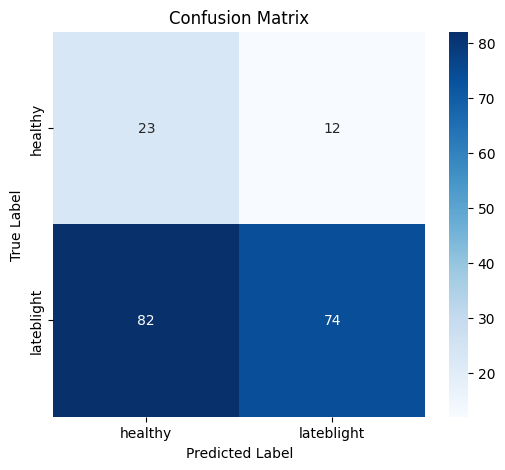


Classification Report:

              precision    recall  f1-score   support

     healthy       0.22      0.66      0.33        35
  lateblight       0.86      0.47      0.61       156

    accuracy                           0.51       191
   macro avg       0.54      0.57      0.47       191
weighted avg       0.74      0.51      0.56       191



In [34]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Initialize lists to store true and predicted labels
y_true = []
y_pred = []

# Iterate over all images again for confusion matrix
for img_path, true_label in image_data:
    # Load and preprocess the image
    img = load_img(img_path, target_size=img_size)
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = img_array / 255.0  # normalize same as training

    # Predict using model
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction, axis=1)[0]
    predicted_label = class_names[predicted_class]

    # Store true and predicted labels as indices
    y_true.append(class_names.index(true_label))
    y_pred.append(class_names.index(predicted_label))

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Print classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))
